In [ ]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
my_data_dir = '/content/drive/MyDrive/Dataset'

In [ ]:
os.listdir(my_data_dir)

['test',
 'train',
 'WhatsApp Image 2022-08-01 at 11.51.08 AM.jpeg',
 'Screenshot_2022-08-03-20-36-25-91_1c337646f29875672b5a61192b9010f9.jpg',
 'Essential Links .gdoc',
 'Pink Eye Detection Using CNN (1).pptx']

In [ ]:
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'

In [ ]:
os.listdir(test_path)
os.listdir(train_path)

['red', 'white']

In [ ]:
os.listdir(train_path+'/red')[0]

'images85.jpg'

In [ ]:
Red_Eye = train_path+'/red'+'/images14.jpg'

In [ ]:
red_img= imread(Red_Eye)

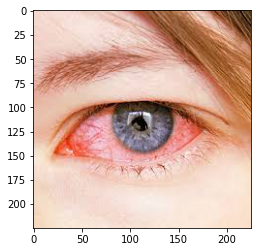

In [ ]:
plt.imshow(red_img)

In [ ]:
red_img.shape

(225, 225, 3)

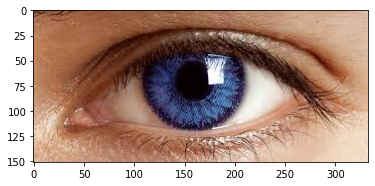

In [ ]:
white_eye_path = train_path+'/white/'+os.listdir(train_path+'white')[44]
white_eye = imread(white_eye_path)
plt.imshow(white_eye)

In [ ]:
len(os.listdir(train_path+'/white'))

603

#Avrg size of images


In [ ]:
white_eye.shape

(151, 333, 3)

In [ ]:
red_img.shape

(225, 225, 3)

In [ ]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'/white'):
    
    img = imread(test_path+'/white'+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [ ]:
np.mean(dim1)

341.2906976744186

In [ ]:
np.mean(dim2)

502.34496124031006

In [ ]:
image_shape = (120,120,3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
)

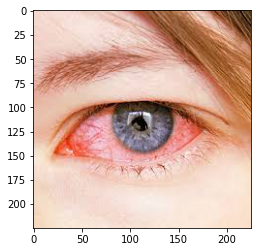

In [ ]:
plt.imshow(red_img)

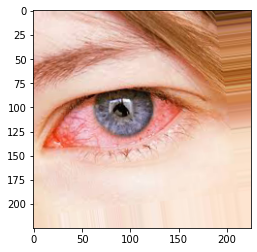

In [ ]:
plt.imshow(image_gen.random_transform(red_img))

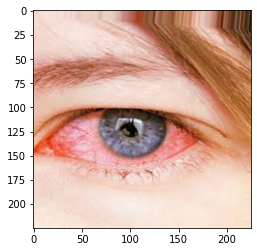

In [ ]:
plt.imshow(image_gen.random_transform(red_img))

In [ ]:
image_gen.flow_from_directory(train_path)

Found 930 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory(test_path)

Found 417 images belonging to 2 classes.


#Creating Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0

#early stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

#Training the Model

In [ ]:
batch_size = 16

In [ ]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 930 images belonging to 2 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 417 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'red': 0, 'white': 1}

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
results = model.fit_generator(train_image_gen,epochs=9,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/9
59/59 [==============================] - 39s 654ms/step - loss: 0.4138 - accuracy: 0.8172 - val_loss: 0.4211 - val_accuracy: 0.7794
Epoch 2/9
59/59 [==============================] - 39s 655ms/step - loss: 0.3638 - accuracy: 0.8559 - val_loss: 0.3143 - val_accuracy: 0.8777
Epoch 3/9
59/59 [==============================] - 39s 656ms/step - loss: 0.3376 - accuracy: 0.8688 - val_loss: 0.3331 - val_accuracy: 0.8585
Epoch 4/9
59/59 [==============================] - 39s 657ms/step - loss: 0.3160 - accuracy: 0.8699 - val_loss: 0.2972 - val_accuracy: 0.8849
Epoch 5/9
59/59 [==============================] - 39s 656ms/step - loss: 0.3510 - accuracy: 0.8602 - val_loss: 0.3388 - val_accuracy: 0.8681
Epoch 6/9
59/59 [==============================] - 41s 690ms/step - loss: 0.3420 - accuracy: 0.8688 - val_loss: 0.2875 - val_accuracy: 0.8873
Epoch 7/9
59/59 [==============================] - 39s 658ms/step - loss: 0.3289 - accuracy: 0.8720 - val_loss: 0.2806 - val_accuracy: 0.8753
Epoch 

In [ ]:
from tensorflow.keras.models import load_model
model.save('eyeclass.h5')

#Evaluating the Model

In [ ]:
losses = pd.DataFrame(model.history.history)

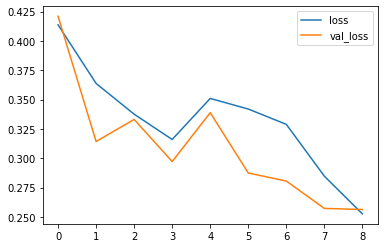

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate_generator(test_image_gen)

[0.25994762778282166, 0.8992805480957031]

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
pred_probabilities = model.predict_generator(test_image_gen)

In [ ]:
pred_probabilities

array([[6.55859590e-01],
       [4.64310758e-02],
       [1.93054117e-02],
       [3.60540561e-02],
       [1.75140947e-02],
       [2.47164458e-01],
       [3.82489860e-01],
       [6.82337508e-02],
       [1.39301732e-01],
       [7.08256587e-02],
       [8.73373672e-02],
       [3.50921720e-01],
       [5.93552738e-03],
       [3.79078910e-02],
       [1.14015359e-02],
       [2.27494732e-01],
       [5.05204022e-01],
       [2.86970347e-01],
       [5.31379521e-01],
       [3.13131571e-01],
       [1.74779873e-02],
       [9.80863869e-02],
       [5.33161461e-02],
       [8.62296373e-02],
       [1.97705789e-03],
       [7.86027551e-01],
       [1.14161866e-02],
       [3.80685106e-02],
       [3.37533541e-02],
       [4.11434621e-01],
       [3.63410227e-02],
       [5.42702936e-02],
       [4.59879637e-03],
       [4.71783392e-02],
       [4.15759813e-03],
       [5.68780233e-04],
       [1.79937273e-01],
       [1.41293719e-01],
       [1.94175355e-02],
       [1.07941546e-01],


In [ ]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
predictions = pred_probabilities > 0.5

In [ ]:
# Numpy can treat this as True/False for us
predictions

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       159
           1       0.95      0.90      0.92       258

    accuracy                           0.90       417
   macro avg       0.90      0.91      0.90       417
weighted avg       0.91      0.90      0.90       417



In [ ]:
confusion_matrix(test_image_gen.classes,predictions)

array([[146,  13],
       [ 27, 231]])

#Predicting an Image

In [ ]:
sample= '/content/drive/MyDrive/Dataset/test/red/Conjunctivitis6.jpg'

In [ ]:
my_image = image.load_img(sample,target_size=image_shape)

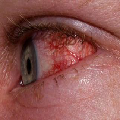

In [ ]:
my_image

In [ ]:
type(my_image)

PIL.Image.Image

In [ ]:
my_image = image.img_to_array(my_image)

In [ ]:
type(my_image)

numpy.ndarray

In [ ]:
my_image.shape

(120, 120, 3)

In [ ]:
my_image = np.expand_dims(my_image, axis=0)

In [ ]:
my_image.shape

(1, 120, 120, 3)

In [ ]:
result=print(model.predict(my_image)) # 1 means White Eye and O means Red Eye
result

1/1 [==============================] - 0s 28ms/step
[[0.]]


In [ ]:
train_image_gen.class_indices

{'red': 0, 'white': 1}

In [ ]:
test_image_gen.class_indices

{'red': 0, 'white': 1}